Find dateset menu.csv in same folder. We will only deal with following attributes
['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A (% Daily
Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']


Q.1:Import libraries (Numpy, pandas, matplotlib, plotly and seaborn) and then read csv file.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

In [2]:
df = pd.read_csv('menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


Q.2: Check statistical facts by checking all columns. Then calculate the maximum value of the following
attributes ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A (%
Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

In [3]:
# check null values
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [4]:
#check the datatype of each attribute in the csv file
df.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [5]:
df.shape

(260, 24)

In [6]:
# Drop dublicate records
df.drop_duplicates(inplace=True)
df[['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']
].max()


Calories                     1880.0
Total Fat                     118.0
Carbohydrates                 141.0
Dietary Fiber                   7.0
Sugars                        128.0
Protein                        87.0
Vitamin A (% Daily Value)     170.0
Vitamin C (% Daily Value)     240.0
Calcium (% Daily Value)        70.0
Iron (% Daily Value)           40.0
dtype: float64

Q.3: Check to see if infact there is any correlation between Calories and other independent variables by
plotting a correlation matrix next.

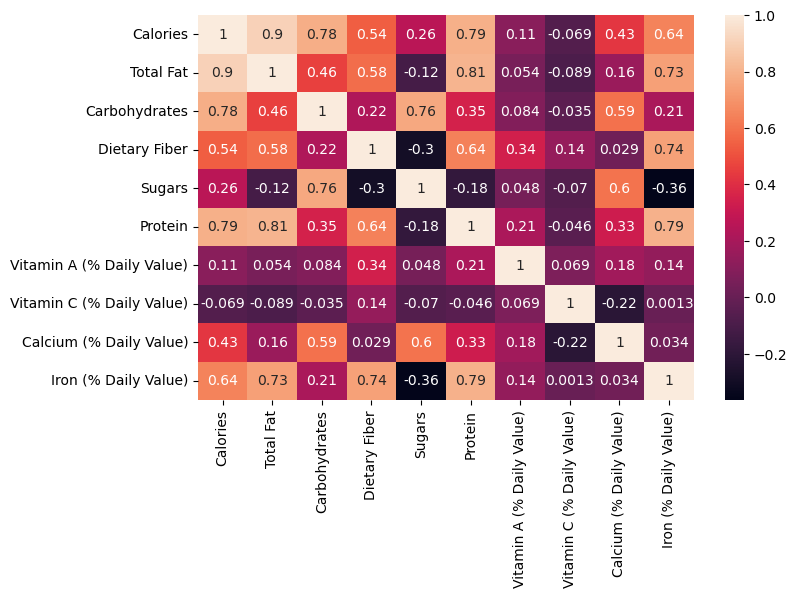

In [7]:
correlation=df[['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']
].corr()

plt.figure(figsize=(8,5))
sns.heatmap(correlation,annot=True)
plt.show()

Postive Correlated Parameters

In [12]:
def get_highly_correlated_variables(correlation_matrix, threshold):
    
    # Get the indices of highly correlated variables
    indices = zip(*np.where(np.abs(correlation_matrix) > threshold))

    # Exclude diagonal and duplicate entries
    correlated_variables = [(correlation_matrix.index[i], correlation_matrix.columns[j])
                            for i, j in indices if i != j and i < j]

    return correlated_variables

# Example usage:
# Replace 'correlation' with your actual correlation matrix, and set your desired threshold
threshold_value = 0.8  # Adjust as needed
highly_correlated_vars = get_highly_correlated_variables(correlation, threshold_value)

# Print the result
print(f"Pairs of variables with correlation above {threshold_value}:\n", highly_correlated_vars)


Pairs of variables with correlation above 0.8:
 [('Calories', 'Total Fat'), ('Total Fat', 'Protein')]


Negative Correlated Parameters

In [14]:
threshold_value = -0.295  # Adjust as needed
highly_correlated_vars = get_highly_correlated_variables(correlation, threshold_value)
print(f"Pairs of variables with correlation above {threshold_value}:\n", highly_correlated_vars)

Pairs of variables with correlation above -0.295:
 [('Calories', 'Total Fat'), ('Calories', 'Carbohydrates'), ('Calories', 'Dietary Fiber'), ('Calories', 'Sugars'), ('Calories', 'Protein'), ('Calories', 'Vitamin A (% Daily Value)'), ('Calories', 'Vitamin C (% Daily Value)'), ('Calories', 'Calcium (% Daily Value)'), ('Calories', 'Iron (% Daily Value)'), ('Total Fat', 'Carbohydrates'), ('Total Fat', 'Dietary Fiber'), ('Total Fat', 'Sugars'), ('Total Fat', 'Protein'), ('Total Fat', 'Vitamin A (% Daily Value)'), ('Total Fat', 'Vitamin C (% Daily Value)'), ('Total Fat', 'Calcium (% Daily Value)'), ('Total Fat', 'Iron (% Daily Value)'), ('Carbohydrates', 'Dietary Fiber'), ('Carbohydrates', 'Sugars'), ('Carbohydrates', 'Protein'), ('Carbohydrates', 'Vitamin A (% Daily Value)'), ('Carbohydrates', 'Vitamin C (% Daily Value)'), ('Carbohydrates', 'Calcium (% Daily Value)'), ('Carbohydrates', 'Iron (% Daily Value)'), ('Dietary Fiber', 'Sugars'), ('Dietary Fiber', 'Protein'), ('Dietary Fiber', 'Vit

Q.4: Draw boxplot for Calories vs Category to spot outliers and max calories category

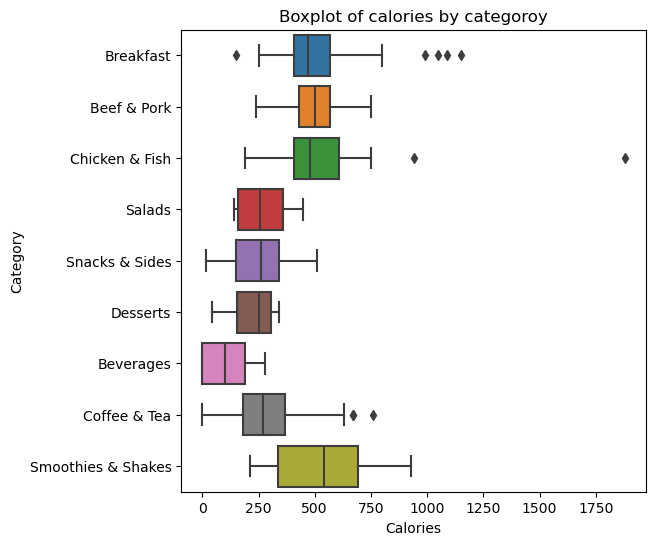

In [41]:
calories_vs_category = df[['Calories','Category']]
plt.figure(figsize=(6,6))
sns.boxplot(x='Calories', y='Category',data=calories_vs_category)
plt.title('Boxplot of calories by categoroy')
plt.show()

Statistics by Category

In [45]:
category_stats = calories_vs_category.groupby('Category')['Calories'].describe()
# Print the summary statistics
print("Summary Statistics by Category:\n", category_stats)




Summary Statistics by Category:
                     count        mean         std    min    25%    50%    75%  \
Category                                                                        
Beef & Pork          15.0  494.000000  141.360734  240.0  430.0  500.0  570.0   
Beverages            27.0  113.703704   99.194764    0.0    0.0  100.0  190.0   
Breakfast            42.0  526.666667  221.675072  150.0  410.0  470.0  570.0   
Chicken & Fish       27.0  552.962963  306.541688  190.0  410.0  480.0  610.0   
Coffee & Tea         95.0  283.894737  157.812808    0.0  180.0  270.0  370.0   
Desserts              7.0  222.142857  108.083962   45.0  155.0  250.0  305.0   
Salads                6.0  270.000000  127.436259  140.0  160.0  255.0  357.5   
Smoothies & Shakes   28.0  531.428571  230.871365  210.0  337.5  540.0  692.5   
Snacks & Sides       13.0  245.769231  141.772208   15.0  150.0  260.0  340.0   

                       max  
Category                    
Beef & Pork      

In [46]:
# Find the category with the maximum calories
max_calories_category = category_stats.loc[category_stats['max'] == category_stats['max'].max()].index[0]
print("\nCategory with Maximum Calories:", max_calories_category)


Category with Maximum Calories: Chicken & Fish


In [64]:
attributes = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein',
              'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

for attribute in attributes:
    print(f"\nTop items for {attribute}:\n")
    top_items = df.sort_values(by=attribute, ascending=False).head(1)  
    print(top_items[['Item', attribute]])



Top items for Calories:

                            Item  Calories
82  Chicken McNuggets (40 piece)      1880

Top items for Total Fat:

                            Item  Total Fat
82  Chicken McNuggets (40 piece)      118.0

Top items for Carbohydrates:

                        Item  Carbohydrates
249  Chocolate Shake (Large)            141

Top items for Dietary Fiber:

                                           Item  Dietary Fiber
88  Premium Southwest Salad with Crispy Chicken              7

Top items for Sugars:

                                     Item  Sugars
253  McFlurry with M&M’s Candies (Medium)     128

Top items for Protein:

                            Item  Protein
82  Chicken McNuggets (40 piece)       87

Top items for Vitamin A (% Daily Value):

                                           Item  Vitamin A (% Daily Value)
84  Premium Bacon Ranch Salad (without Chicken)                        170

Top items for Vitamin C (% Daily Value):

                            

Q.6: Draw Stripplot for each
category against the following
attributes ['Calories', 'Total Fat',
'Carbohydrates', 'Dietary
Fiber', 'Sugars', 'Protein',
'Vitamin A (% Daily Value)',
'Vitamin C (% Daily Value)',
'Calcium (% Daily Value)', 'Iron
(% Daily Value)'.